# Import Libraries

In [1]:
import os
import pandas as pd
from utils.lstm_model_ss import LSTMModel

2023-06-10 08:59:30.941084: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-10 08:59:31.149303: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-10 08:59:31.149340: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-10 08:59:33.003003: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Import The Dataset

In [2]:
df_list = []

for i in range(1, 3):
    df = pd.read_csv(
        f"./dataset/Fprepros_pond{i}_linear.csv", index_col=0, parse_dates=True
    )
    df_list.append(df)

dataset = pd.concat(df_list)

In [3]:
# dataset = pd.read_csv(data_path, index_col=0, parse_dates=True)
test_dataset = pd.read_csv(
    "./dataset/Fprepros_pond3_linear.csv", index_col=0, parse_dates=True
)

DATASET = dataset.drop(dataset.columns[-2:], axis=1)
TEST_DATASET = test_dataset.drop(test_dataset.columns[-2:], axis=1)

# Hyperparameters

In [4]:
# Model Parameters
NUM_OF_LAYERS: int = 2
NUM_OF_NEURONS_FOR_EACH_LAYER: tuple = (64, 32)
DROPOUT_REGULARIZATION: tuple = (0.2, 0.2)
ACTIVATION_FUNCTION = "tanh"
OPTIMIZER = "adam"
METRICS: tuple = ('mae', 'mean_squared_error', 'accuracy')
SHUFFLE: bool = True
EPOCHS: int = 10

# Dataset Parameters
TRAIN_SIZE: float = 0.8
BATCH_SIZE: int = 32
BUFFER_SIZE: int = len(DATASET)
INPUT_WIDTH: int = 10

# LSTM Class Instantiation

In [5]:
friza: LSTMModel = LSTMModel()

friza.num_layers = NUM_OF_LAYERS
friza.num_neurons = NUM_OF_NEURONS_FOR_EACH_LAYER
friza.dropout_regularization = DROPOUT_REGULARIZATION
friza.hyperparameters = (
    ACTIVATION_FUNCTION,
    METRICS,
    OPTIMIZER,
    BATCH_SIZE,
    EPOCHS,
    BUFFER_SIZE,
    INPUT_WIDTH,
    len(DATASET.columns),
)
friza.dataset = (DATASET, TRAIN_SIZE, SHUFFLE)

2023-06-10 08:59:37.178714: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-10 08:59:37.178750: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-10 08:59:37.178786: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (archlinux): /proc/driver/nvidia/version does not exist
2023-06-10 08:59:37.179158: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 10, 128)          36352     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 77,958
Trainable params: 77,958
Non-traina

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
24/25 [===========================>..] - ETA: 0s - loss: 0.2581 - mean_squared_error: 0.1366 - accuracy: 0.5013WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fae6b71de60> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
25/25 [==============================] - 20s 156ms/step - loss: 0.2552 - mean_squared_error: 0.1339 - accuracy: 0.4994 - val_loss: 0.1572 - val_mean_squared_error: 0.0363 - val_accuracy: 0.8272
Epoch 2/10
25/25 [==============================] - 1s 26ms/step - loss: 0.1252 - mean_squared_error: 0.0281 - accuracy: 0.7181 - val_loss: 0.1213 - val_mean_squared_error: 0.0231 - val_accuracy: 0.9058
Epoch 3/10
25/25 [==============================] - 1s 26ms/step - loss: 0.1091 - mean_squared_error: 0.0220 - accuracy: 0.7977 - val_loss: 0.1098 - val_mean_squared_error: 0.0204 - val_accuracy: 0.9110
Epoch 4/10
25/25 [==============================] - 1s 31ms/step - loss: 0.1027 - mean_sq

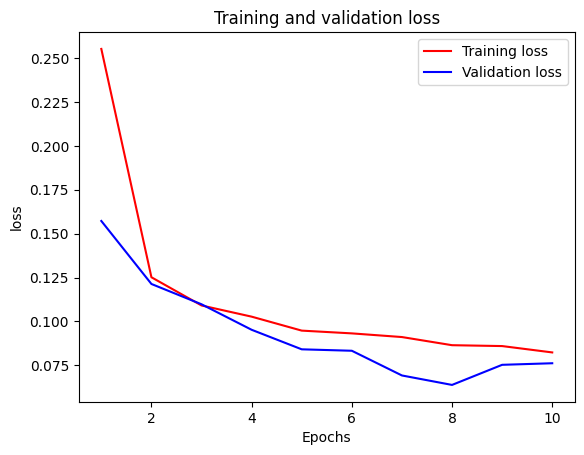

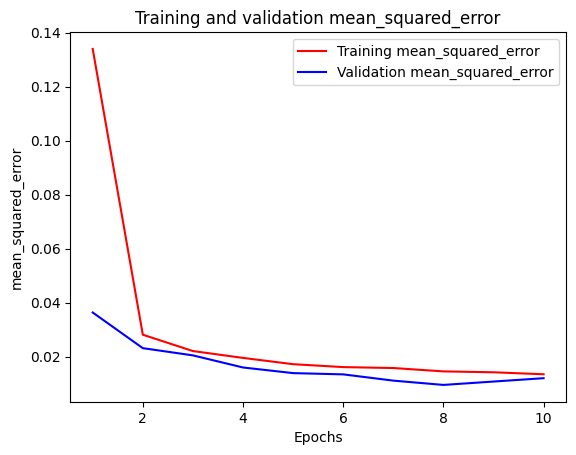

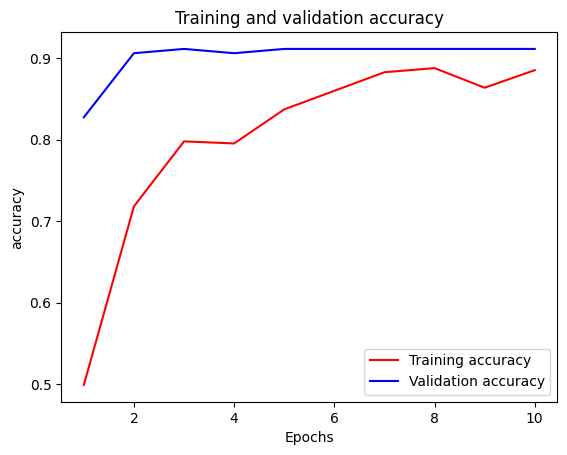

In [6]:
friza.model()
friza.inspect()  # TRUE, TRUE, TRUE
friza.train()
friza.plot_history()

loss: 0.04894188046455383
mean_squared_error: 0.0051808347925543785
accuracy: 0.9492273926734924
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


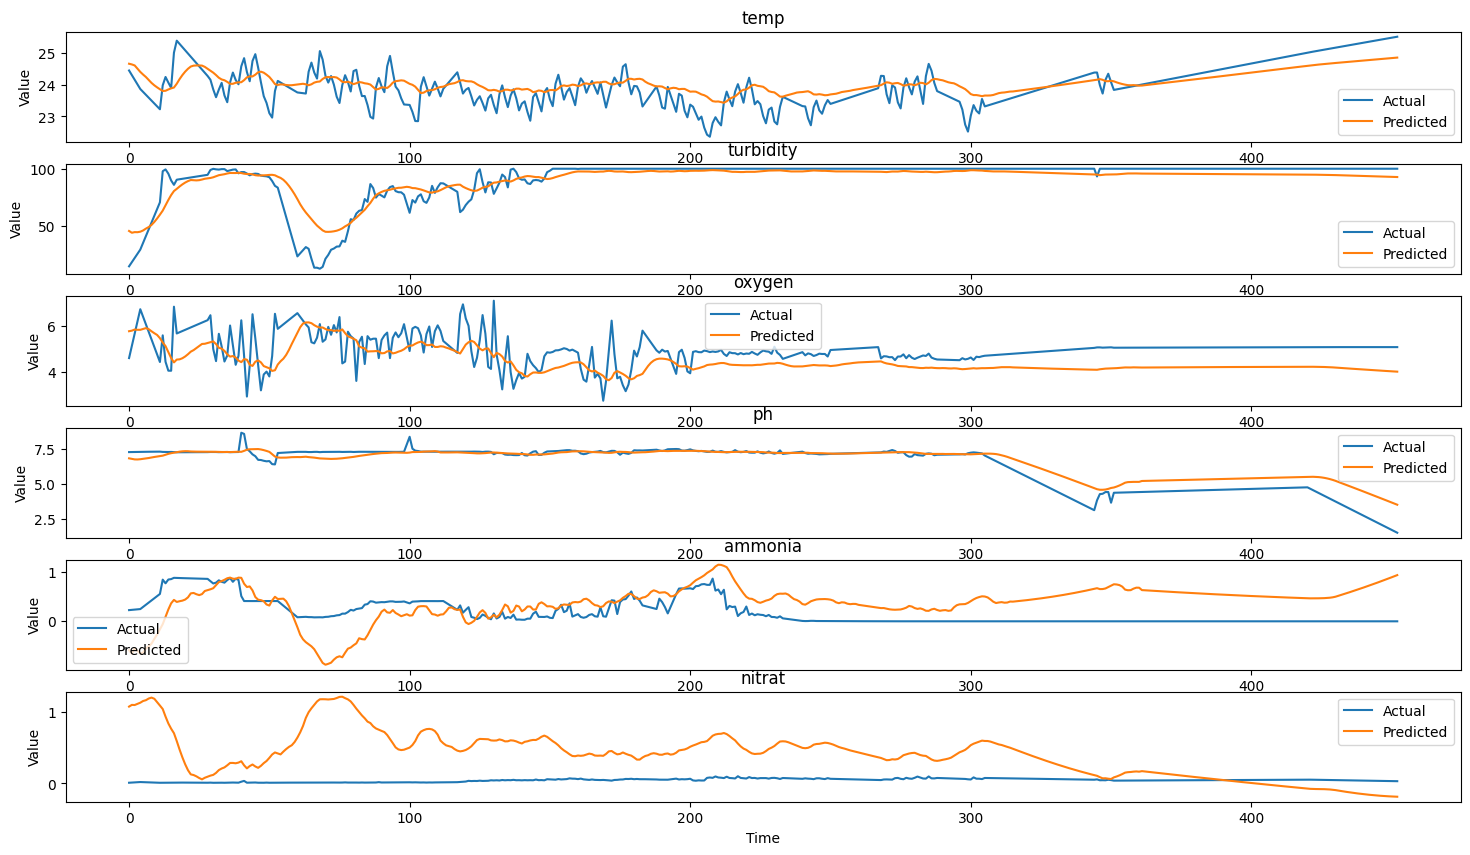

In [7]:
friza.predict(TEST_DATASET)

In [9]:
model_dir = os.listdir()

if 'models' not in model_dir:
    os.mkdir('models')

friza.save('models/friza_model.h5', 'h5')

IsADirectoryError: [Errno 21] Unable to create file (unable to open file: name = 'models/friza_model', errno = 21, error message = 'Is a directory', flags = 13, o_flags = 242)